<a href="https://colab.research.google.com/github/Aku02/Awesome-pytorch-list/blob/master/Copy_of_DL4V_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Welcome to Assignment 1 on Deep Learning for Computer Vision.**
In this assignment you will get a chance to implement basic Image processing tasks like Correlation, Convolution, Edge Detection etc.

#### **Instructions**
1. Use Python 3.x to run this notebook
2. Write your code only in between the lines 'YOUR CODE STARTS HERE' and 'YOUR CODE ENDS HERE'.
you sould not change anything else code cells, if you do, the answers you are supposed to get at the end of this assignment might be wrong.
3. Read documentation of each function carefully.
4. All the best!

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive
Mounted at /content/gdrive


In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# %matplotlib inline uncomment this line if you're running this notebook on your local PC

In [ ]:
# DO NOT CHANGE THIS CODE
np.random.seed(0)

In [ ]:
def standardize(image):
    eps = 1e-5  # some fields have all 255 so variance will be 0, to avoid division by zero, introduced eps
    return (image - np.mean(image))/(np.std(image)+eps)

In [ ]:

# Implement Linear Filtering technique on an image using a linear filter
def linear_filter(image, filter_): # 'filter' is a keyword in python, so is the underscore at the end.
    """
    Performs linear filtering on an image.
    Assume image size is W1xW2, filter size is F1xF2.
    
    Arguments:
    image -- input image possibly with 3 channels(RGB).
    filter_ -- linear filter to apply on image.
    
    Returns:
    result -- filtered image. 
    """
    # DO NOT CHAGE THIS CODE    
    image = np.array(image.convert('L')) # converts image to gray scale, so that it is easy to apply filter
    image_height, image_width = image.shape[0], image.shape[1]
    #print(image.shape)
    
    filter_ = np.array(filter_.convert('L'))
    filter_height, filter_width = filter_.shape[0], filter_.shape[1]
    #print(filter_.shape)

    # result shape will be of size --> (((W1−F1+2P) / S) + 1) x (((W2−F2+2P) / S) + 1), where 'P' is padding length
    # S is stride length, if you don't know about them, don't worry, you will learn in upcoming lectures.For now
    # we will use simplest setting P=0,S=1. See the next line.

    result_height, result_width = (image_height - filter_height) + 1, (image_width - filter_width) + 1
    result = np.array([[0 for j in range(result_width)] for i in range(result_height)])
    #print(result.shape)
    
    # YOUR CODE STARTS HERE
    for i in range(result_width):
        for j in range(result_height):
            result[j][i] = np.sum(np.multiply(image[j:j+filter_height, i:i+filter_width], filter_))
    # YOUR CODE ENDS HERE
    return result

In [ ]:
# To test your implementation, run the below code.
image = Image.open('/content/gdrive/My Drive/Assignment1/images/car_road.jpg')
filter_ = Image.open('/content/gdrive/My Drive/Assignment1/images/car.jpg')
#filter_ = np.array([[-1,0,1], [-1,0,1],[-1,0,1]])
result = linear_filter(image, filter_)

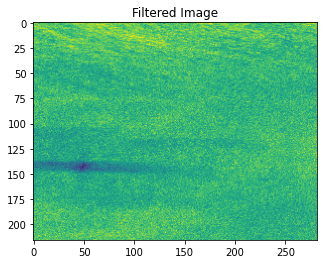

In [ ]:
plt.imshow(result)
plt.title('Filtered Image')
plt.show()

In [ ]:
#arr = np.array(result)
a = np.where(result == result.max())
print(a)

(array([18]), array([113]))


3057249
(18, 113)


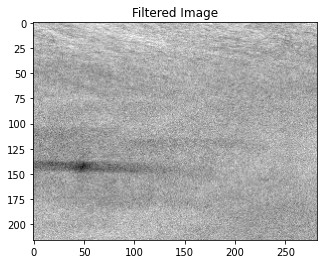

In [ ]:
result_car = result
plt.imshow(abs(result_car), cmap='gray')
plt.title('Filtered Image')
#plt.show()
#print(result_car[143,49])
#print(result_car[134,47])
print(result_car[130,33])
#print(result_car[126,50])
idx = np.unravel_index(np.argmax(result_car), result_car.shape)
print(idx)

### Question 1

Where do you find the bright spot in the image displayed above? (*Hint:* Find the co-ordinates of the maximum value in the output array  )

1. $(143, 49)$
2. $(134, 47)$
3. $(130, 33)$
4. $(126, 50)$

In [ ]:
# To test your implementation, run the below code.
image = Image.open('/content/gdrive/My Drive/Assignment1/images/hills.jpeg')
filter_ = Image.open('/content/gdrive/My Drive/Assignment1/images/template.png')
result = linear_filter(image, filter_)

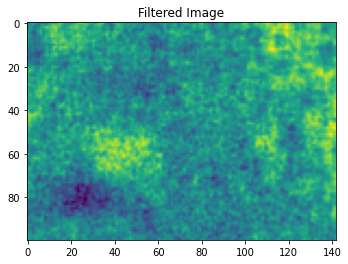

In [ ]:
plt.imshow(result)
plt.title('Filtered Image')
plt.show()
result_hill = result

### Question 2

Where do you find the bright spot in the image displayed above? (*Hint:* Find the co-ordinates of the maximum value in the output array  )

1. $(2, 130)$
2. $(25, 118)$
3. $(0, 137)$
4. $(42, 115)$

In [ ]:
a = np.where(result == result.max())
print(result_hill[2,130])
print(result_hill[25,118])
print(result_hill[0,137])
print(result_hill[42,115])


1360688
1357758
1346955
1338798


In [ ]:
def convolution2D(image, kernel):
    """
    Performs convolution on an image using a kernel.
    
    Arguments:
    image -- 2D matrix representing image.
    kernel -- kernel to apply on image.
    
    Returns:
    result -- filtered image. 
    """
    # YOUR CODE STARTS HERE
    # DO NOT CHAGE THIS CODE    
    image = np.array(image.convert('L')) # converts image to gray scale, so that it is easy to apply filter
    image_height, image_width = image.shape[0], image.shape[1]
    
    kernel = np.array(kernel.convert('L'))
    print(kernel)
    filter_height, filter_width = kernel.shape[0], kernel.shape[1]

    # result shape will be of size --> (((W1−F1+2P) / S) + 1) x (((W2−F2+2P) / S) + 1), where 'P' is padding length
    # S is stride length, if you don't know about them, don't worry, you will learn in upcoming lectures.For now
    # we will use simplest setting P=0,S=1. See the next line.

    result_height, result_width = (image_height - filter_height) + 1, (image_width - filter_width) + 1
    result = np.array([[0 for j in range(result_width)] for i in range(result_height)])
    kernel = np.flip(kernel)
    print(kernel)
    for i in range(result_height):
        for p in range(result_width):
            intensity = np.sum(image[i:(filter_height+i),p:(filter_width+p)]* kernel)
            #intensity = np.sum(intensity)
            result[i,p] = intensity
    # YOUR CODE ENDS HERE
    return result

In [ ]:
def convolve2d(image, kernel):
    """
    This function which takes an image and a kernel and returns the convolution of them.

    :param image: a numpy array of size [image_height, image_width].
    :param kernel: a numpy array of size [kernel_height, kernel_width].
    :return: a numpy array of size [image_height, image_width] (convolution output).
    """
    # Flip the 
    image = np.array(image.convert('L'))
    kernel = np.flipud(np.fliplr(kernel))
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x]=(kernel * image_padded[y: y+3, x: x+3]).sum()

    return output

In [ ]:
def convolution2d(image, kernel):
    m, n = kernel.shape
    immage = np.array(image)
    y, x = image.shape[0], image.shape[1]
    y = y - m + 1
    x = x - m + 1
    new_image = np.zeros((y,x))
    for i in range(y):
        for j in range(x):
            new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image

In [ ]:
from scipy import ndimage
def conv(image, kernel):
  image = np.array(image.convert('L'))
  kernel = np.array(kernel.convert('L'))
  out = ndimage.convolve(image, kernel)
  return out

# To test your implementation, run the below code.
image = Image.open('/content/gdrive/My Drive/Assignment1/images/car_road.jpg')
filter_ = Image.open('/content/gdrive/My Drive/Assignment1/images/car.jpg')
#KERNEL = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
result = conv(image, kernel = filter_)

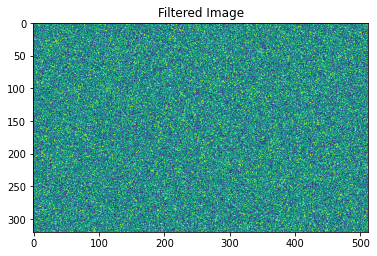

In [ ]:
plt.imshow(result)
plt.title('Filtered Image')
plt.show()

### Question 3

What are index of the min and max values in the above image?

1. $(43, 134), (200, 54)$
2. $(38, 142), (215, 61)$
3. $(30, 118), (198, 54)$
4. $(44, 142), (220, 43)$

In [ ]:
print(result[43, 134], result[200, 54])
print(result[38, 142], result[215, 61])
print(result[30, 118], result[198, 54])
print(result[44, 142], result[220, 43])


192 63
52 103
160 214
187 92


In [ ]:
# To test your implementation, run the below code.
image = Image.open('/content/gdrive/My Drive/Assignment1/images/hills.jpeg')
filter_ = Image.open('/content/gdrive/My Drive/Assignment1/images/template.png')
result = conv(image, kernel = filter_)
print(result.shape)

(225, 225)


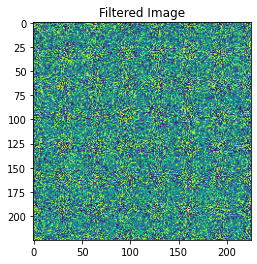

In [ ]:
plt.imshow(result)
plt.title('Filtered Image')
plt.show()

### Question 4

What are index of the min and max values in the above image?

1. $(15, 28), (18, 89)$
2. $(0, 27), (22, 98)$
3. $(4, 17), (14, 70)$
4. $(7, 42), (10, 89)$

In [ ]:
print(result[15,28], result[18,89])
print(result[0,27], result[22,98])
print(result[4,17], result[14,70])
print(result[7,42], result[10,89])
idx = np.unravel_index(np.argmax(result), result.shape)
print(idx)

123 102
68 225
86 110
34 4
(0, 208)


## Sobel and Laplace Filters

### Question 5: 
In this question you'll have to apply a Sobel Filter to the provided image and report the index of min and max value of the final output.

1. $(52, 147), (111, 26)$
2. $(50, 134), (100, 31)$
3. $(56, 152), (116, 18)$
4. $(51, 143), (114, 24)$


In [ ]:
from scipy import ndimage
import numpy as np
from PIL import Image

image = Image.open('/content/gdrive/My Drive/Assignment1/images/clown.png')

###YOUR CODE STARTS HERE
def sobel(image):
  image = np.array(image.convert('L'))
  # Define 3*3 Vertical sobel filter (Hint: refer lecture slides)
  sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

  #Define 3*3 Horizontal sobel filter (Hint: refer lecture slides)
  sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

  #compute vertical response using convolution2D function
  response_v = ndimage.convolve(image, sobel_v)

  #compute horizontal response using convolution2D function
  response_h = ndimage.convolve(image, sobel_h)

  #compute final response
  # G = |G_x| + |G_y|
  G = np.round(np.sqrt( np.square(response_v) + np.square(response_h)))
  return G

#compute index of min and max value of G
waste = sobel(image)
#print(np.where(waste == waste.min()))
print(waste.max())
print(waste.shape)
###YOUR CODE ENDS HERE

16.0
(256, 256)


In [ ]:
print(waste[52, 147], waste[111, 26])
print(waste[50, 134], waste[100, 31])
print(waste[56, 152], waste[116, 18])
print(waste[51, 143], waste[14, 24])

13.0 11.0
6.0 7.0
8.0 9.0
8.0 12.0


In [ ]:
def sobel_dum(image):
  #image = np.array(image.convert('L'))
  # Define 3*3 Vertical sobel filter (Hint: refer lecture slides)
  sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

  #Define 3*3 Horizontal sobel filter (Hint: refer lecture slides)
  sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

  #compute vertical response using convolution2D function
  response_v = convolve2d(image, sobel_v)

  #compute horizontal response using convolution2D function
  response_h = convolve2d(image, sobel_h)

  #compute final response
  # G = |G_x| + |G_y|
  G = np.abs(response_v) + np.abs(response_h)
  #G = np.round(np.sqrt( np.square(response_v) + np.square(response_h)))
  return G

In [ ]:
image = Image.open('/content/gdrive/My Drive/Assignment1/images/clown.png')
new = sobel_dum(image)
print(np.where(new== new.min()))

(array([  1,   1,   1, ..., 255, 255, 255]), array([ 73, 176, 180, ...,  43,  62, 196]))


In [ ]:
new = waste 
print(waste[52, 147], waste[111, 26])
print(waste[50, 134], waste[100, 31])
print(waste[56, 152], waste[116, 18])
print(waste[51, 143], waste[14, 24])

13.0 11.0
6.0 7.0
8.0 9.0
8.0 12.0


In [ ]:
idx = np.unravel_index(np.argmax(new), new.shape)
print(idx)

(1, 73)


### Question 6

What are index of the min and max values of the Laplace Filter response to the provided image?

1. $(4, 117), (111, 26)$
2. $(13, 134), (100, 31)$
3. $(6, 108), (111, 26)$
4. $(10, 104), (106, 22)$

In [ ]:

import numpy as np
from PIL import Image

image = Image.open('./images/clown.png')

###YOUR CODE STARTS HERE

# Define 3*3 Laplace filter (Hint: refer lecture slides)
laplacian_filter = 

#compute response using convolution2D function
response_L = 

#compute index of min and max value of Laplace Filter response

###YOUR CODE ENDS HERE

In [ ]:
def dummy(gray):
    gray = np.array(gray.convert('L'))
    sobel_v = filters.sobel_v(gray)
    sobel_h = filters.sobel_h(gray)
    #sobel_v = filters.gaussian(sobel_v, sigma=2.0)
    #sobel_h = filters.gaussian(sobel_h, sigma=2.0)

    mask_v = np.abs(sobel_v) > .03
    mask_h = np.abs(sobel_h) > .03
    G = sobel_v + sobel_h
    return G

In [ ]:
image = Image.open('/content/gdrive/My Drive/Assignment1/images/clown.png')
new = dummy(image)
print(new)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.08235294  0.12156863 ... -0.0372549  -0.00784314
   0.        ]
 [ 0.          0.1         0.14313725 ... -0.04705882 -0.02156863
   0.        ]
 ...
 [ 0.          0.05294118  0.07058824 ...  0.04705882  0.07058824
   0.        ]
 [ 0.          0.01960784  0.02745098 ...  0.10588235  0.09019608
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [ ]:
idx = np.unravel_index(np.argmax(new), new.shape)
print(idx)

(75, 224)


In [ ]:
waste = new 
print(waste[52, 147], waste[111, 26])
print(waste[50, 134], waste[100, 31])
print(waste[56, 152], waste[116, 18])
print(waste[51, 143], waste[14, 24])

0.011764705882352934 -0.0607843137254902
-0.18431372549019606 -0.025490196078431393
0.003921568627450987 -0.14117647058823532
-0.011764705882352941 -0.1294117647058823


In [ ]:
a = -0.14117647058823532
b = -0.025490196078431393
print(a>b)

False


In [ ]:
def laplacian_filter(img, K=3):
    img = np.array(img)
    H, W= img.shape
    # padding
    pad = K//2
    img2 = np.zeros((H+pad*2, W+pad*2), dtype=np.float)
    img2[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)
    # kernel
    kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    # filtering
    img3 = img2.copy()
    for h in range(H):
        for w in range(W):
          img3[h+pad, w+pad] = np.sum(kernel*img2[h:h+K, w:w+K])
    img3 = np.clip(img3, 0, 255)
    img3 = img3[pad:pad+H, pad:pad+W].astype(np.uint8)
    return img3

In [ ]:
img = Image.open('/content/gdrive/My Drive/Assignment1/images/clown.png')
lap = laplacian_filter(image)
print(lap)

[[ 0  0  0 ...  0  0  0]
 [ 0 25  0 ...  1  9  0]
 [ 0 18  0 ...  2  0  0]
 ...
 [ 0  2  0 ... 14  0  0]
 [ 0  9  0 ... 28  0  0]
 [ 0  0  0 ...  0  0  0]]


In [ ]:
print(lap[4, 117], lap[111, 26])
print(lap[13, 134], lap[100, 31])
print(lap[6, 108], lap[111, 26])
print(lap[10, 104], lap[106, 22])

5 0
3 0
0 0
0 0


In [ ]:
idx = np.unravel_index(np.argmax(lap), lap.shape)
print(idx)

(208, 134)
